In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")


In [59]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/nypd_crime_pct.csv'
tb_nypd = pd.read_csv(url)
tb_nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADDR_PCT_CD                     77 non-null     float64
 1   assault_3_&_related_offenses    77 non-null     float64
 2   criminal_mischief_&_related_of  77 non-null     float64
 3   dangerous_drugs                 77 non-null     float64
 4   felony_assault                  77 non-null     float64
 5   grand_larceny                   77 non-null     float64
 6   harrassment_2                   77 non-null     float64
 7   miscellaneous_penal_law         77 non-null     float64
 8   off._agnst_pub_ord_sensblty_&   77 non-null     float64
 9   petit_larceny                   77 non-null     float64
 10  robbery                         77 non-null     float64
dtypes: float64(11)
memory usage: 6.7 KB


In [16]:
tb_nypd.head()

,ADDR_PCT_CD,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery
0,1.0,0.076161,0.076669,0.038842,0.016248,0.199035,0.128459,0.009647,0.076669,0.366591,0.011678
1,5.0,0.119613,0.105920,0.035441,0.056383,0.172372,0.135320,0.028594,0.036649,0.277487,0.032219
2,6.0,0.102410,0.082329,0.043507,0.028447,0.245984,0.111446,0.011714,0.032463,0.312249,0.029451
3,7.0,0.150417,0.140268,0.086626,0.037695,0.116709,0.169627,0.030083,0.054368,0.178688,0.035520
4,9.0,0.119617,0.087813,0.086969,0.037996,0.194202,0.119617,0.022798,0.046440,0.251618,0.032930


In [60]:
cluster_vars = ['assault_3_&_related_offenses', 'criminal_mischief_&_related_of',
       'dangerous_drugs', 'felony_assault', 'grand_larceny', 'harrassment_2',
       'miscellaneous_penal_law', 'off._agnst_pub_ord_sensblty_&',
       'petit_larceny', 'robbery']

In [61]:
nypd_scaler = StandardScaler()
nypd_scaler.fit(tb_nypd[cluster_vars])

tb_sca_nypd = pd.DataFrame(nypd_scaler.transform(tb_nypd[cluster_vars]), columns = cluster_vars)

tb_sca_nypd.index = tb_nypd['ADDR_PCT_CD']
tb_sca_nypd.head()

,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery
ADDR_PCT_CD,,,,,,,,,,
1.0,-1.769627,-1.848631,-0.465030,-1.640554,1.482863,-1.210202,-1.375525,1.161788,2.298396,-2.019062
5.0,-0.350660,-0.859256,-0.555377,0.303081,1.000618,-1.009768,-0.373630,-1.480392,0.965852,-0.399129
6.0,-0.912465,-1.657186,-0.341117,-1.049780,2.332003,-1.707208,-1.266258,-1.756760,1.485719,-0.617419
7.0,0.655259,0.302514,0.804196,-0.601945,-0.006138,-0.007575,-0.294899,-0.310603,-0.511687,-0.138799
9.0,-0.350534,-1.471704,0.813312,-0.587357,1.395447,-1.468496,-0.680153,-0.834014,0.578987,-0.343071


# Hierarchical Clustering

1. *Affinity* (or distance function)
    - *Eucliden*
    - *Cosine*
1. ***Linkage***
    - (Max) **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters: Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    - (Avg) **Average linkage** minimizes the average of the distances between all observations of pairs of clusters. Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.
    - (Min) **Single linkage** minimizes the distance between the closest observations of pairs of clusters. Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
    - **Ward** minimizes the error sum of squares (also known as variance) of cluster combinations.

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

We can use SciPy for visualizing the dendogram:

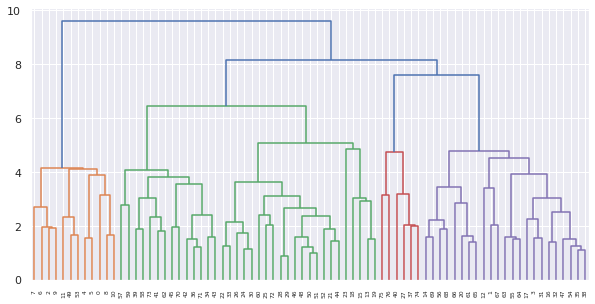

In [65]:
fig = plt.figure(figsize = (10, 5))
link = linkage(tb_sca_nypd, method = 'complete')
census_dendogram = dendrogram(link)

For calculating & fitting hierarchical clustering models we're better served by SKLEARN's `AgglomerativeClustering` class:

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
hc_fit = AgglomerativeClustering(n_clusters = 5, 
                                 affinity='euclidean', 
                                 linkage='complete')
hc_fit.fit(tb_sca_nypd)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [68]:
tb_sca_nypd['clu_ward'] = [str(x) for x in hc_fit.labels_]
tb_nypd['clu_ward'] = [str(x) for x in hc_fit.labels_]

In [69]:
tb_sca_nypd['clu_ward'].value_counts()

2    23
0    22
4    14
3    12
1     6
Name: clu_ward, dtype: int64

In [70]:
tb_sca_nypd

,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery,clu_ward
ADDR_PCT_CD,,,,,,,,,,,
1.0,-1.769627,-1.848631,-0.465030,-1.640554,1.482863,-1.210202,-1.375525,1.161788,2.298396,-2.019062,3
5.0,-0.350660,-0.859256,-0.555377,0.303081,1.000618,-1.009768,-0.373630,-1.480392,0.965852,-0.399129,2
6.0,-0.912465,-1.657186,-0.341117,-1.049780,2.332003,-1.707208,-1.266258,-1.756760,1.485719,-0.617419,3
7.0,0.655259,0.302514,0.804196,-0.601945,-0.006138,-0.007575,-0.294899,-0.310603,-0.511687,-0.138799,2
9.0,-0.350534,-1.471704,0.813312,-0.587357,1.395447,-1.468496,-0.680153,-0.834014,0.578987,-0.343071,3
...,...,...,...,...,...,...,...,...,...,...,...
115.0,1.725858,-0.948163,-0.218406,0.793737,0.042710,-0.327262,0.010998,-0.048150,-0.685241,1.750590,0
120.0,0.827456,0.936922,-0.306507,-0.095874,-1.080362,1.996360,0.252395,0.695883,-0.861857,-0.458091,4
121.0,-0.809827,-0.561626,-0.453203,-0.613599,-0.823752,1.640264,-0.002094,1.875556,0.733007,-1.328893,1


In [72]:
tb_sca_nypd['ADDR_PCT_CD'] = tb_sca_nypd.index
tb_nypd_melt = tb_sca_nypd.melt(id_vars = ['clu_ward', 'ADDR_PCT_CD'])
tb_nypd_melt

,clu_ward,ADDR_PCT_CD,variable,value
0,3,1.0,assault_3_&_related_offenses,-1.769627
1,2,5.0,assault_3_&_related_offenses,-0.350660
2,3,6.0,assault_3_&_related_offenses,-0.912465
3,2,7.0,assault_3_&_related_offenses,0.655259
4,3,9.0,assault_3_&_related_offenses,-0.350534
...,...,...,...,...
765,0,115.0,robbery,1.750590
766,4,120.0,robbery,-0.458091
767,1,121.0,robbery,-1.328893
768,1,122.0,robbery,-1.487026


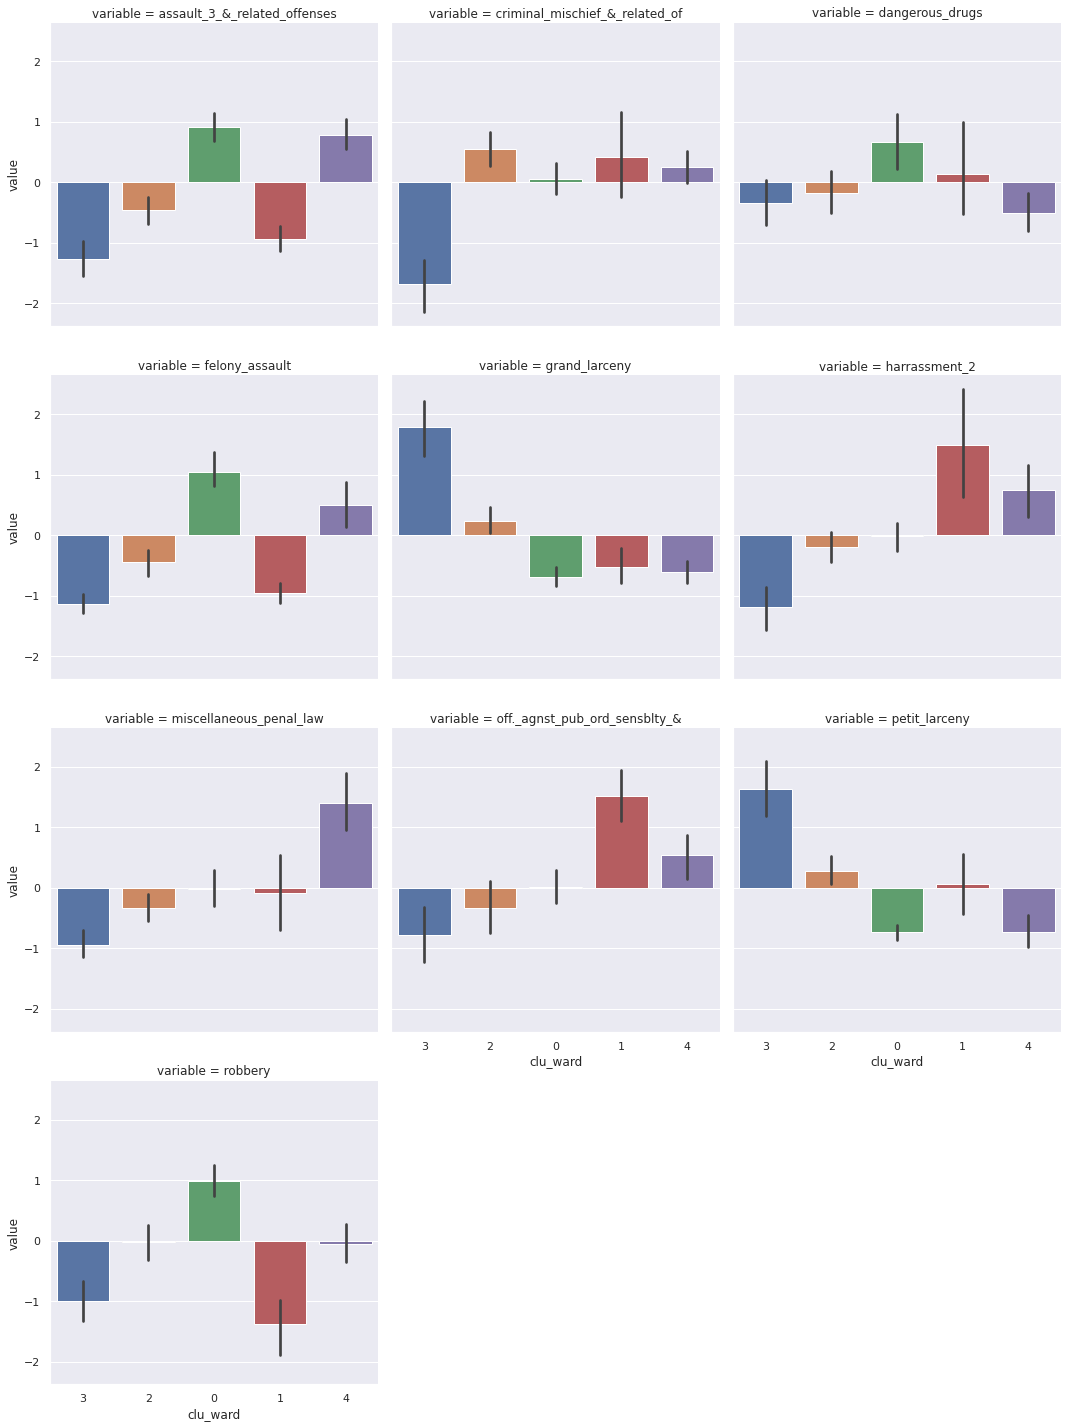

In [73]:
sns.catplot(data = tb_nypd_melt, x = 'clu_ward', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)

In [58]:
# Back at 18h30
# Back at 16h30
# Back at 14h30